In [1]:
import pandas as pd


file_paths = {
    'brand_keyword': 'C:/Users/82106/Desktop/데이터분석 프로젝트/개인 프로젝트 1/data/open/preprocessed_brand_keyword.csv',
    'sales_data': 'C:/Users/82106/Desktop/데이터분석 프로젝트/개인 프로젝트 1/data/open/preprocessed_sales_df.csv',
    'train_data': 'C:/Users/82106/Desktop/데이터분석 프로젝트/개인 프로젝트 1/data/open/preprocessed_train_df.csv',
    'product_info': 'C:/Users/82106/Desktop/데이터분석 프로젝트/개인 프로젝트 1/data/open/product_info.csv'
}


dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}


for name, df in dataframes.items():
    print(f"{name} - First few rows:\n", df.head(), "\n")



brand_keyword - First few rows:
           브랜드  2022-01-01  2022-01-02  2022-01-03  2022-01-04  2022-01-05  \
0  B002-00001     0.84131     0.91383    1.450530    2.422390    1.871190   
1  B002-00002    12.64868    20.27850   15.332170   12.750210   13.562510   
2  B002-00003     0.33362     0.43516    0.362630    0.174060    0.217580   
3  B002-00005     1.07339     1.71163    2.016240    1.914700    1.987230   
4  B002-00006     0.00000     0.00000    0.188558    0.246574    0.246574   

   2022-01-06  2022-01-07  2022-01-08  2022-01-09  ...  2023-03-26  \
0    1.581080    1.232950    1.174930    1.145920  ...    0.319110   
1   13.707570   11.937910   15.564250   14.084710  ...   10.269790   
2    0.464170    0.420650    0.290100    0.377130  ...    0.536690   
3    2.146790    1.682620    1.378000    1.421520  ...    2.219320   
4    0.246574    0.377139    0.087012    0.261084  ...    0.072526   

   2023-03-27  2023-03-28  2023-03-29  2023-03-30  2023-03-31  2023-04-01  \
0    0

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


brand_keyword_df = dataframes['brand_keyword']
missing_values = brand_keyword_df.isnull().sum().sum()
outliers = brand_keyword_df.describe().loc[['min', 'max']]


# Convert the date columns to datetime format and set as index
brand_keyword_df_long = brand_keyword_df.melt(id_vars='브랜드', var_name='날짜', value_name='검색빈도')
brand_keyword_df_long['날짜'] = pd.to_datetime(brand_keyword_df_long['날짜'])

brand_trends = brand_keyword_df_long.groupby('브랜드').mean().sort_values(by='검색빈도', ascending=False)


missing_values, outliers, brand_trends.head()


(0,
      2022-01-01  2022-01-02  2022-01-03  2022-01-04  2022-01-05  2022-01-06  \
 min    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 max  798.062518  675.889247  636.940837  590.986016  875.140589  581.847277   
 
      2022-01-07  2022-01-08  2022-01-09  2022-01-10  ...  2023-03-26  \
 min    0.000000    0.000000    0.000000      0.0000  ...    0.000000   
 max  669.027928  686.319028  686.456304   1259.0128  ...  717.733546   
 
      2023-03-27  2023-03-28  2023-03-29  2023-03-30  2023-03-31  2023-04-01  \
 min    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 max  572.042813  552.009156  547.410481  548.585374  556.433662  662.840267   
 
      2023-04-02  2023-04-03  2023-04-04  
 min    0.000000    0.000000    0.000000  
 max  669.571415  593.019443  564.919958  
 
 [2 rows x 459 columns],
                   검색빈도
 브랜드                   
 B002-00939  596.075687
 B002-00579  549.095635
 B002-03382  459.043145
 B002-01097  41

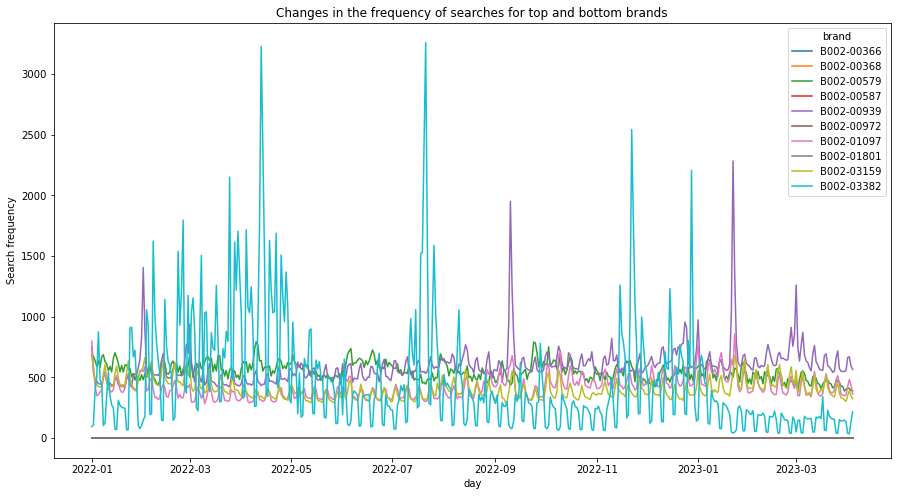

In [5]:
# Step 3: 상위 및 하위 브랜드 분석
# 상위 5개 및 하위 5개 브랜드 선택
top_brands = brand_trends.head(5).index
bottom_brands = brand_trends.tail(5).index

# 해당 브랜드들의 검색 빈도 추출
top_bottom_brands = brand_keyword_df_long[brand_keyword_df_long['브랜드'].isin(top_brands.union(bottom_brands))]

# Step 4: 시각화
# 상위 및 하위 브랜드의 검색 빈도 변화 시각화
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_bottom_brands, x='날짜', y='검색빈도', hue='브랜드')
plt.title('Changes in the frequency of searches for top and bottom brands')
plt.xlabel('day')
plt.ylabel('Search frequency')
plt.legend(title='brand')
plt.show()


##### 상위 브랜드들의 검색 빈도 변화: 
상위 브랜드들의 검색 빈도는 시간에 따라 상당한 변동성을 보이며, 일부 브랜드는 특정 시점에서 높은 검색 빈도를 보인다. 이는 마케팅 캠페인이나 특정 이벤트의 영향일 수 있다.

##### 하위 브랜드들의 검색 빈도: 
하위 브랜드들은 상대적으로 낮은 검색 빈도를 유지하고 있으며, 시간에 따른 변화가 덜 뚜렷하다.

##### 검색 빈도의 시기별 변화: 
특정 시기에 검색 빈도가 급증하는 경향이 관찰된다. 이는 계절적 요인, 광고 캠페인, 제품 출시 등 다양한 요인에 의해 영향을 받을 수 있다.